In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mtplb

nm = 1e-3
mkm = 1
mm = 1e3
cm = 1e4

displays = {
    "lcd1":
        {
            "model": "nikon_s2550",
            "w": 5.4, # cm
            "h": 4, # cm
            "diag": 2.7, # ''
            "num_of_points": 230000, 
            "pixel_area": 54000*40000/230000, #mkm^2,
            "pixel_ratio": 1.7
        },
    "lcd2":
        {
            "model": "nikon_l14",
            "w": 4.8, # cm
            "h": 3.6, # cm
            "diag": 2.4, # ''
            "num_of_points": 115000, 
            "pixel_area": 48000*36000/115000, #mkm^2 
            "pixel_ratio": 2/3
        },
}

def matrix_lcd1(xp,yp):
    b, w, h = 0.05, 0.4, 0.8
    y = yp%1
    x = (xp + (0.75 * (yp % 2 > 1)))
    flag_w = ((x % (1.5)) < 0.5)
    x = x%1
    rect1 = (x > b) & (x < b+w) & (y > b) & (y < b+h) & flag_w
    rect2 = (x > 0.5+b) & (x < 0.5 + b+w) & (y > (1-b-h)) & (y < 1-b) & flag_w
    return (rect1 | rect2).astype(int)

D = 100 * cm /10
plane = (8*cm, 8*cm)
wave = 650*nm
resolution = (500,500)
# resolution = (2000,2000)
# resolution = (100,100)
gr_size = (resolution[0] / plane[0]*wave*D, resolution[1] / plane[1]*wave*D)
gr_step = (1/plane[0]*wave*D, 1/plane[1]*wave*D)

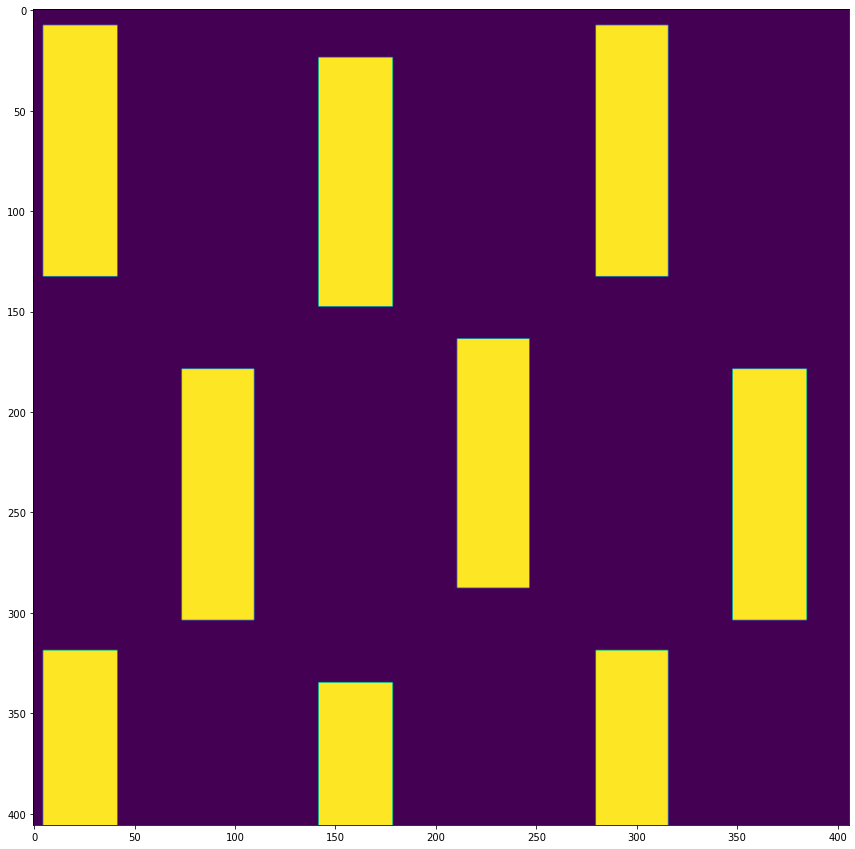

In [2]:
width = np.sqrt(displays["lcd1"]["pixel_area"]/displays["lcd1"]["pixel_ratio"]) #mkm
height = displays["lcd1"]["pixel_area"] / width #mkm
matrix = np.fromfunction(lambda x, y: matrix_lcd1(x*(gr_step[0]/width),y*(gr_step[1]/height)), (int(gr_size[0]), int(gr_size[1])) )
fig = plt.figure(figsize=(15,15))
plt.imshow(matrix.T, interpolation=None)

......................................................................................................................................................................................................................................................................................................................................................................................................................
(500, 500) (406, 406, 1, 1)
(500, 500)


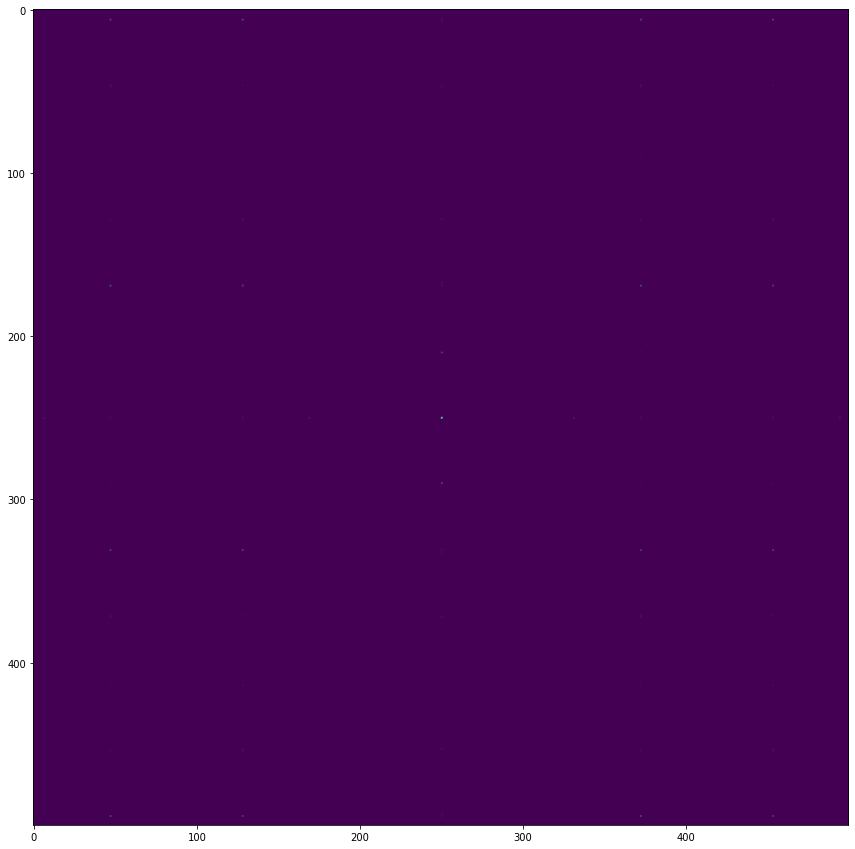

In [4]:
def diffracted(matrix, plane, resolution):
    factor_x = plane[0] / resolution[0]
    center_x = int(plane[0]/2)
    factor_y = plane[1] / resolution[1]
    center_y = int(plane[1]/2)
    # center_matr = (int(matrix.shape[0]/2), int(matrix.shape[1]/2))
    def calc(xpoint,ypoint):
        x = factor_x * xpoint - center_x
        y = factor_y * ypoint - center_y
        real_sum = np.zeros_like(x)
        im_sum = np.zeros_like(y)
        assert real_sum.shape == im_sum.shape,"Ooops"
        for xp in range(matrix.shape[0]):
            for yp in range(matrix.shape[1]):
                if matrix[xp,yp]:
                    real_sum += np.cos(-2*np.pi / wave / D* (x*xp*10 + y*yp*10))
                    im_sum += np.sin(-2*np.pi / wave / D* (x*xp*10 + y*yp*10))
            print(".",end="")
        print("")
        real = real_sum
        imaginary = im_sum
        amplitude = (np.power(real,2) + np.power(imaginary,2))
        print(amplitude.shape, matrix.T[:,:,np.newaxis,np.newaxis].shape)
        return amplitude
    return calc

interference = np.fromfunction(diffracted(matrix, plane, resolution), resolution)
print(interference.shape)
fig = plt.figure(figsize=(15,15))
plt.imshow(interference, interpolation=None)#, norm=mtplb.colors.LogNorm(vmin=np.min(interference), vmax=np.max(interference)))

(406, 406) (406, 406)


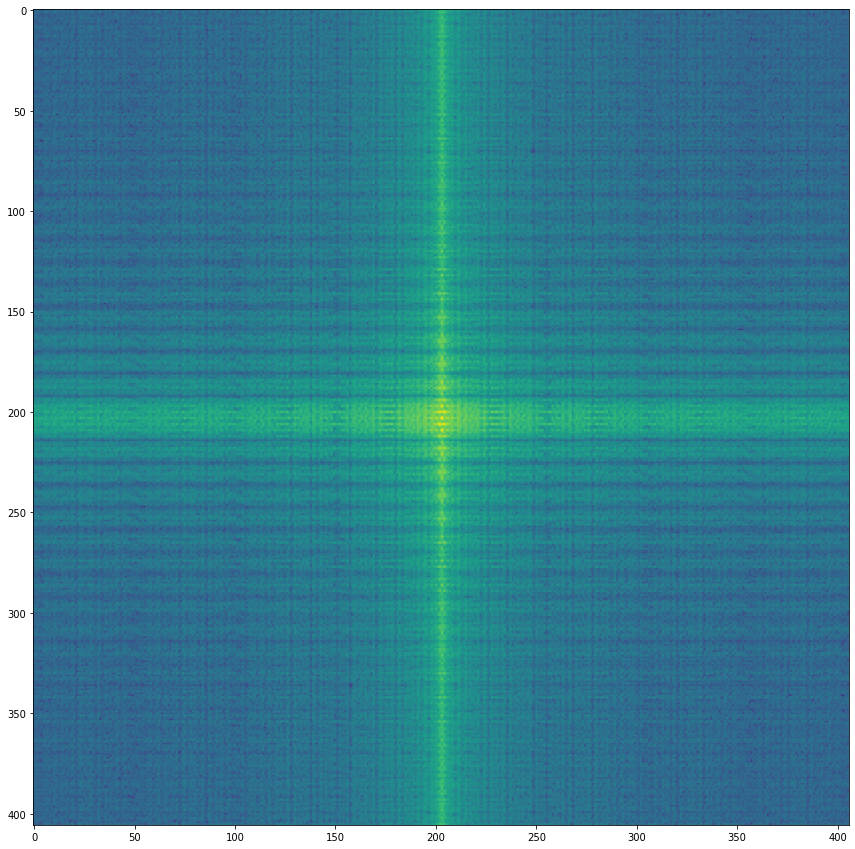

In [5]:
fig = plt.figure(figsize=(15,15))
transform = np.absolute( np.fft.fftshift(np.fft.fft2 (matrix)))
plt.imshow(transform, norm=mtplb.colors.LogNorm(vmin=np.min(transform), vmax=np.max(transform)))
print(transform.shape, matrix.shape)